## Import librairies

In [1]:
import pandas as pd
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Import data

In [2]:
df = pd.read_csv('pl_data.csv')

In [3]:
df

,images,category
0,Orange\Orange_177.jpg,Orange
1,Orange\Orange_318.jpg,Orange
2,Orange\Orange_473.jpg,Orange
3,Orange\Orange_202.jpg,Orange
4,Orange\Orange_412.jpg,Orange
...,...,...
1456,Bananes\Banana_262.jpg,Bananes
1457,Bananes\Banana_162.jpg,Bananes
1458,Orange\Orange_59.jpg,Orange
1459,Bananes\Banana_314.jpg,Bananes


In [4]:
df['category']

0        Orange
1        Orange
2        Orange
3        Orange
4        Orange
         ...   
1456    Bananes
1457    Bananes
1458     Orange
1459    Bananes
1460    Bananes
Name: category, Length: 1461, dtype: object

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['category'])
y = le.transform(df['category'])
print(y.shape)
print(list(le.inverse_transform([0, 1, 2])))

(1461,)
['Bananes', 'Orange', 'Pommes']


In [6]:
X = []
index = 0

for files in df.images: 
    X.append(cv2.cvtColor(cv2.imread(files), cv2.COLOR_BGR2RGB))
    index = index+1

X = np.asarray(X)
print(X.shape)

(1461, 100, 100, 3)


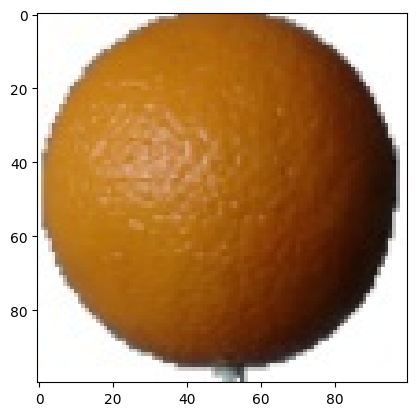

In [7]:
plt.imshow(X[0])

## Split into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(978, 100, 100, 3)
(978,)
(483, 100, 100, 3)
(483,)


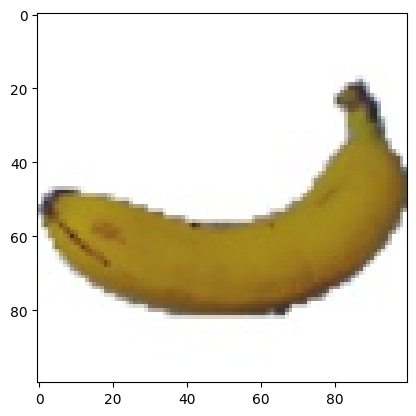

In [9]:
plt.imshow(X_train[15])

## Build the model

In [10]:
model = keras.models.Sequential()

#model.add( keras.layers.Input((28,28,1))) #input layer

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu', input_shape = (100,100,3)) )#8 2dconvolutiv planes, kernel size 3*3
model.add( keras.layers.MaxPooling2D((2,2)))#reduce the image size on 4
model.add( keras.layers.Dropout(0.2))#deactivate randomely some neuron outputs (regularization and avoid overfitting)

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(32, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.3))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(400, activation='relu'))
model.add( keras.layers.Dropout(0.1))
model.add( keras.layers.Dense(400, activation='relu'))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Dense(3, activation='softmax'))

c:\Users\sacha\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\henallux 2024-2025\Q2\Systèmes intelligents\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

model.compile(optimizer='adam',#function for get down the gradient
              loss='sparse_categorical_crossentropy',#loss function for classification
              metrics=['accuracy']) #the metric 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │     1,280,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,448,035 (5.52 MB)

 Trainable params: 1,448,035 (5.52 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [12]:
%%time

batch_size  = 20
epochs      =  5
history = model.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1)
                    #   validation_data = (X_test, y_test))

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7454 - loss: 10.1150
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 9.3046e-04
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 1.1385e-04
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9964 - loss: 0.0065
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9978 - loss: 0.0024
CPU times: total: 4.56 s
Wall time: 10.2 s


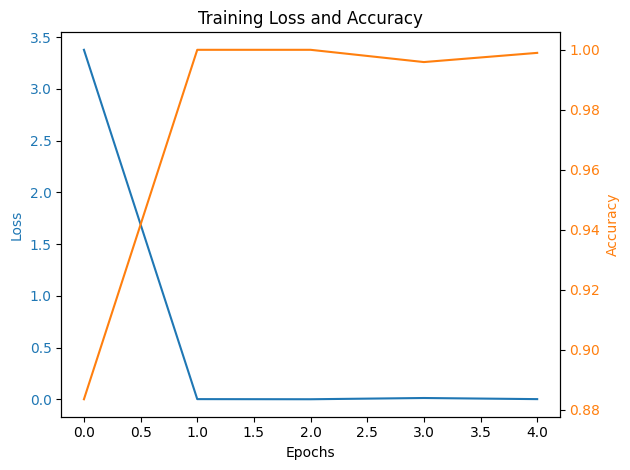

In [13]:
fig, ax1 = plt.subplots()

# Plot loss on the primary y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(history.history['loss'], label='Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.plot(history.history['accuracy'], label='Accuracy', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and show the plot
plt.title('Training Loss and Accuracy')
fig.tight_layout()
plt.show()

## Evaluation

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0000
Test accuracy : 1.0000


In [15]:
y_sigmoid = model.predict(X_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       174
           1     1.0000    1.0000    1.0000       136
           2     1.0000    1.0000    1.0000       173

    accuracy                         1.0000       483
   macro avg     1.0000    1.0000    1.0000       483
weighted avg     1.0000    1.0000    1.0000       483

1.0


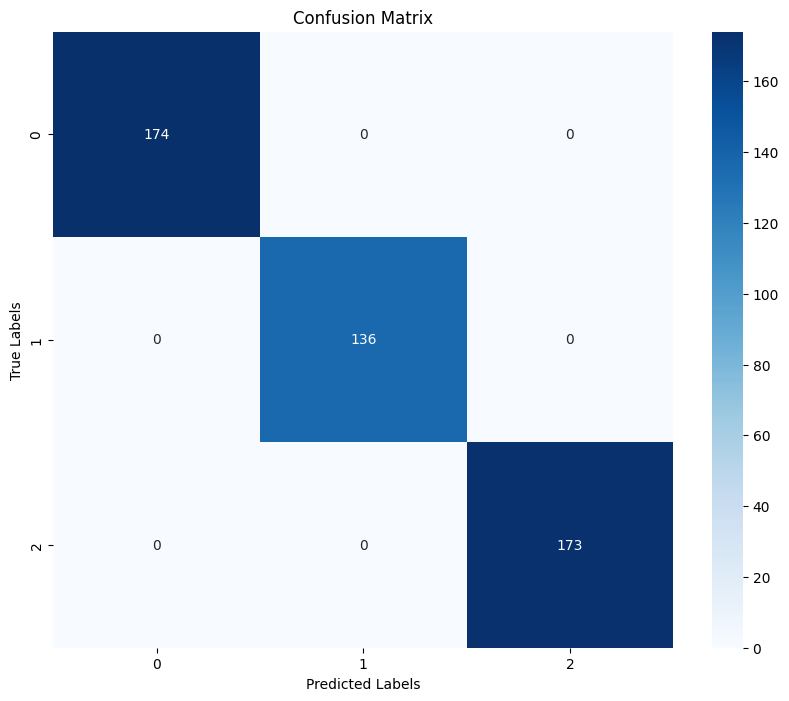

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# import scikitplot as skplt 

print(classification_report(y_test,y_pred,digits = 4))
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Save and load the model and try with new data

In [17]:
# YOU NEED TO CHANGE THE FILEPATH
model_path = "C:\\\\Users\\mdpdomco\\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\\Cours\\M1\\systemes intelligents\\05_FruitsClassification\\reco.keras"
tf.keras.models.save_model(
    model,
    filepath = model_path,
    overwrite=True,
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\\\Users\\mdpdomco\\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\\Cours\\M1\\systemes intelligents\\05_FruitsClassification\\reco.keras'

In [ ]:

model2 = keras.models.load_model(model_path)

## Save the model bis

In [ ]:
model_json = model.to_json()
with open("fruits_classifier.json", 'w') as json_file:
    json_file.write(model_json)
model.save("fruits_classifier.h5")

In [ ]:
from keras.models import model_from_json
json_file = open("fruits_classifier.json", "r")
model_json = json_file.read()
json_file.close()
model2 = model_from_json(model_json)
model2.load_weights("fruits_classifier.h5")

In [ ]:
NewData1 = cv2.cvtColor(cv2.imread('NouvelleBanane.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(NewData1)

In [ ]:
NewData1 = cv2.resize(NewData1,(100,100))
plt.imshow(NewData1)

In [ ]:
NewData2 = cv2.cvtColor(cv2.imread('NouvelleOrange.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(NewData2)

In [ ]:
NewData2 = cv2.resize(NewData2,(100,100))
plt.imshow(NewData2)

In [ ]:
NewData3 = cv2.cvtColor(cv2.imread('NouvellePomme.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(NewData3)

In [ ]:
NewData3 = cv2.resize(NewData3,(100,100))
plt.imshow(NewData3)

In [ ]:
NewData = np.stack((NewData1,NewData2,NewData3), axis = 0)

In [ ]:
NewData.shape

In [ ]:
y_sigmoid = model2.predict(NewData)
y_pred    = np.argmax(y_sigmoid, axis=-1)
print(y_pred)

# Next steps
adapt the code to classify the entire dataset available at https://github.com/Horea94/Fruit-Images-Dataset

Use the proposed train and test separation in the folders. 

first tackle only with the first word of each folder as class : "Apple Braeburn" -> "Apple" 
Then try to differentiate between the different categories of the same fruit.